print 5 random numbers between 0 to 10, with a hi greeting including the name of the person.

In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, END
import random

In [2]:
class AgentState(TypedDict):
    name : str
    numbers : List[int]
    counter : int

In [3]:
def greeting_node(state : AgentState) -> AgentState:
    """the function create a greeting for the person."""
    state["name"] = f"Hi {state["name"]}!"
    state["counter"] = 0
    return state

def random_node(state : AgentState) -> AgentState:
    """the function to create random number between 0 to 10."""
    state["numbers"].append(random.randint(0,10))
    state["counter"] += 1
    return state

def looping_node(state : AgentState) -> AgentState:
    """the function which decide the loop to be end"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"       # Continue Looping
    else:
        return "exit"       # Exit the loop


In [4]:
# greeting -> random -> random -> random -> random -> random -> exit

In [5]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",                   # the source node
    looping_node,               # the action to be performed or routing logic
    {
        "loop" : "random",      # self loop back to the same node
        "exit" : END            # End the graph
    }
)

graph.set_entry_point("greeting")
app = graph.compile()

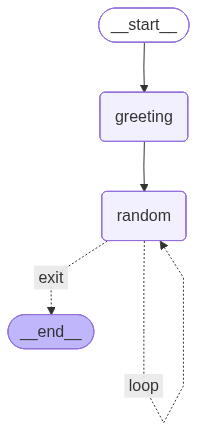

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({"name" : "Gaurav", "numbers" : [], "counter" : -2})
result

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi Gaurav!', 'numbers': [10, 7, 1, 4, 2], 'counter': 5}